## Classification Problem
* Email- Spam _detection 
** Binary Classification 
** Multiclass classification (more than one thing or another)
imagnet is most popular data set for computer Vision
-1000 object classess
* Multilabel Classification 
-> it might have more label 

* Binary Vs Multi class(one thing or another)
->Binary Classification (one thing or another)
-> Multi Classification (more than one thing or another)

*  what we're going to cover 
-> Architecture of a nueral Classification model
-> Input Shapes and output shapes of a classification model (numerical data )
-> Creating custom data to view, fit on predict on 
-> steps in modelling
--> Creating a model, setting a loss function and optimiser, creating a training loop, evaluating a model 
-> saving and loading models
-> Harnessing the power of non-linearity 
-> Different classification evaluation methods

* classification input and output 
* -> Input-> machine Learning-> output (W, H, C) -> labels (width , heigth, channel )
* Architecture of a classification 
->Input_layer()-> hidden_layer-> Neuron per Hidden layer-> output activation-> Loss function -> optimizer


In [1]:
import sklearn 
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
#Make 1000 sample
n_samples=1000
X,y= make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f" First 5 sample of X:{X[:5]}")

 First 5 sample of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [5]:
print(f" First 5 sample of Y:{y[:5]}")

 First 5 sample of Y:[1 1 1 1 0]


In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y
                      })
circles.head(21)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
# Visulazie 
import matplotlib.pyplot as plt




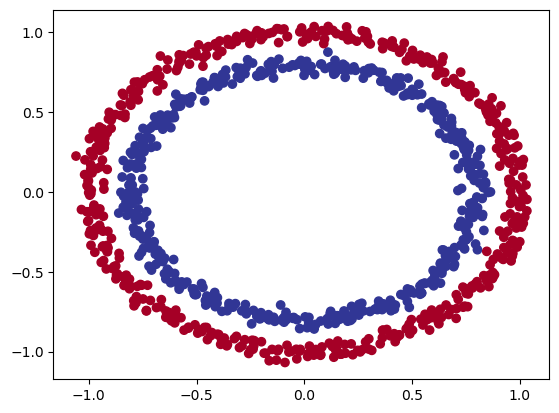

In [9]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu )
plt.show()

In [10]:
#### 1.1 Input and output shapes


In [11]:
X.shape,y.shape

((1000, 2), (1000,))

In [12]:
# View the first example of feature and labels 
X_sample=X[0]
y_sample=y[0]
print(X_sample,"\n")
print(X_sample.shape)
print(y_sample)
print(y_sample.shape)


[0.75424625 0.23148074] 

(2,)
1
()


In [13]:
## converting data into tensor
import torch
torch.__version__


'2.9.1+cpu'

In [14]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [15]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [16]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [17]:
y[:5]

tensor([1., 1., 1., 1., 0.])

In [18]:
 # spilt data into training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
len(X_train)


800

In [20]:
len(X_test)

200

In [21]:
len(y_train),len(y_test)

(800, 200)

In [22]:
## Building a model 
# Let's build  a model to classify our 1 and 0 or blue and red dots

# TO do sos we want to :
# 1. setup device agonistic code our code will run on a accelerator (GPU) if there is one 
# 2. construct a model (by subclassinf 'nn.Module')
# 3.  Define a loss funtion and optimizer
# 4.  training and test loop


In [23]:
import torch 
from torch import nn

# make  device agonstic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we setup device agnostic code  let's create a model that 
1. subclass  'nn.Module '(almost all models in Pytorch subclass 'nn.Module')
2. create 2 'nn.linear()' layers that are capable of handling the shapes of our data
3. Define a ' forward()' method that outlines the forward pass (or forward computation )
4. Instatiate an instance of our model class and send it to the targe device 


In [24]:
# 1. Construct a model a subclass nn.Module 
class CircleModuleV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2.  Create nn.linear layers capable of handling the shape of our model 
        self.layer_1=nn.Linear(in_features=2,out_features=5) # takes in 2 feature to 5 feature 
        self.layer_2=nn.Linear(in_features=5,out_features=1) # take 5 feature and downscale the model to 1 one feature 
    #3.  Define a forward () method that outline the forward pass
    def forward(self,x):
        return self.layer_2(self.layer_1(x))

#4 Instantiate an instance of our model class and send it to the target device

model_0= CircleModuleV0().to(device)
model_0 

CircleModuleV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
device

'cpu'

In [26]:
next(model_0.parameters()).device

device(type='cpu')

In [27]:
#  let's replicate the model above using nn.Sequential
model_0= nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1481,  0.4224],
                      [ 0.3897,  0.0359],
                      [ 0.3072,  0.0485],
                      [ 0.4015, -0.3057],
                      [-0.2923,  0.2129]])),
             ('0.bias', tensor([-0.0767,  0.5598, -0.5229,  0.6017,  0.4847])),
             ('1.weight',
              tensor([[-0.0700,  0.0345, -0.3039,  0.1148, -0.0908]])),
             ('1.bias', tensor([0.4123]))])

In [29]:
# make Prediction 
untrained_preds=model_0(X_test.to(device))

In [30]:
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.5610],
        [0.5271],
        [0.6640],
        [0.5318],
        [0.6863],
        [0.6654],
        [0.5522],
        [0.5846],
        [0.6629],
        [0.5250]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [31]:
#### 2.1 setup the loss function

### which loss funtion or optimizer should you use?
 
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [32]:
# calculate  accuracy - out of 100 example, what percentage does our model get right?

def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

### Train model 
 * Forward Pass
 * Calculate the loss
 * optimizer zero grad
 * Loss Backward 
 * Optimizer Step 


## our model output are going to be raw **logits**
# we can convert these **logits** into prediction probabilites by passing them to some kind of activation function 


Then we can convert our models prediction probabilites to ** prediction labels** by either rounding them or taking them


In [33]:
y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[0.5610],
        [0.5271],
        [0.6640],
        [0.5318],
        [0.6863]], grad_fn=<SliceBackward0>)

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [35]:
#Use sigmoid activation function on the model
y_pred_probs=torch.sigmoid(y_logits.to(device))
y_pred_probs[:5]

tensor([[0.6367],
        [0.6288],
        [0.6602],
        [0.6299],
        [0.6651]], grad_fn=<SliceBackward0>)

In [36]:
# torch.round() to round the prediction to the nearest integer 0 or 1 
torch.round(y_pred_probs)[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)

For our Prediction probability values, we need to perform a range-style rounding on them :
* y_pred >=0.5, y=1 (class=1)
* y_pred <0.5, y=0 (class=0)

In [37]:
# Find the predicted labels
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# Check for equality
print(torch.eq(y_pred_probs.squeeze(),y_pred_labels.squeeze()))

y_pred_probs.squeeze()

tensor([False, False, False, False, False])


tensor([0.6367, 0.6288, 0.6602, 0.6299, 0.6651], grad_fn=<SqueezeBackward0>)

In [38]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [39]:
### Building a training and testing loop in pytorch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
x_train,y_train= X_train.to(device),y_train.to(device)
X_test,y_test= X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    y_logits=model_0(x_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)         
    if epoch % 1 ==0:
        print(f"Epoch:{epoch}|loss:{loss:.5f},Acc:{acc:.2f}%|Test_loss:{test_loss:.5f},Test_acc:{test_acc:.2f}%")

Epoch:0|loss:0.74186,Acc:50.00%|Test_loss:0.73285,Test_acc:50.00%
Epoch:1|loss:0.73670,Acc:50.00%|Test_loss:0.72838,Test_acc:50.00%
Epoch:2|loss:0.73211,Acc:50.00%|Test_loss:0.72439,Test_acc:50.00%
Epoch:3|loss:0.72801,Acc:50.00%|Test_loss:0.72083,Test_acc:50.00%
Epoch:4|loss:0.72434,Acc:50.00%|Test_loss:0.71766,Test_acc:50.00%
Epoch:5|loss:0.72107,Acc:50.00%|Test_loss:0.71482,Test_acc:50.00%
Epoch:6|loss:0.71815,Acc:50.00%|Test_loss:0.71230,Test_acc:50.00%
Epoch:7|loss:0.71555,Acc:50.00%|Test_loss:0.71005,Test_acc:50.00%
Epoch:8|loss:0.71322,Acc:50.00%|Test_loss:0.70804,Test_acc:50.00%
Epoch:9|loss:0.71114,Acc:50.00%|Test_loss:0.70626,Test_acc:50.00%
Epoch:10|loss:0.70928,Acc:50.00%|Test_loss:0.70466,Test_acc:50.00%
Epoch:11|loss:0.70762,Acc:50.00%|Test_loss:0.70324,Test_acc:50.00%
Epoch:12|loss:0.70614,Acc:50.00%|Test_loss:0.70197,Test_acc:50.00%
Epoch:13|loss:0.70482,Acc:50.00%|Test_loss:0.70084,Test_acc:50.00%
Epoch:14|loss:0.70363,Acc:50.00%|Test_loss:0.69984,Test_acc:50.00%
Epoch

In [40]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [41]:
import matplotlib.pyplot as plt

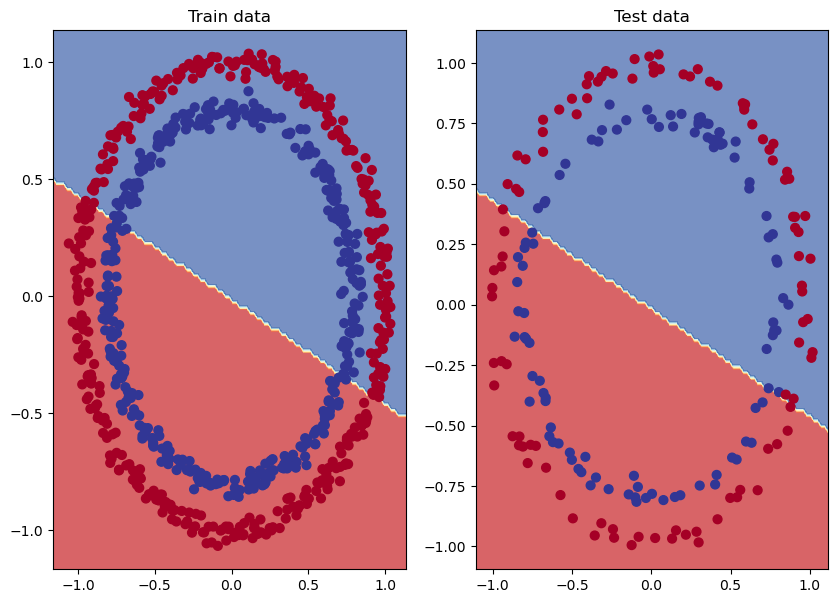

In [42]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train data")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test data")
plot_decision_boundary(model_0,X_test,y_test)

Preparing data to see if our model can make a straight line prediction]


In [43]:
weight=0.7
bias=0.3
start=0
end=1
step=0.01
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias
print(len(X_regression))
print(X_regression.shape)
print(y_regression.shape)
X_regression[:5],y_regression[:5]

100
torch.Size([100, 1])
torch.Size([100, 1])


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [44]:
train_split=int(0.8*len(X_regression))
X_train_regression=X_regression[:train_split]
y_train_regression=y_regression[:train_split]
X_test_regression=X_regression[train_split:]
y_test_regression=y_regression[train_split:]

print(len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression))

80 80 20 20


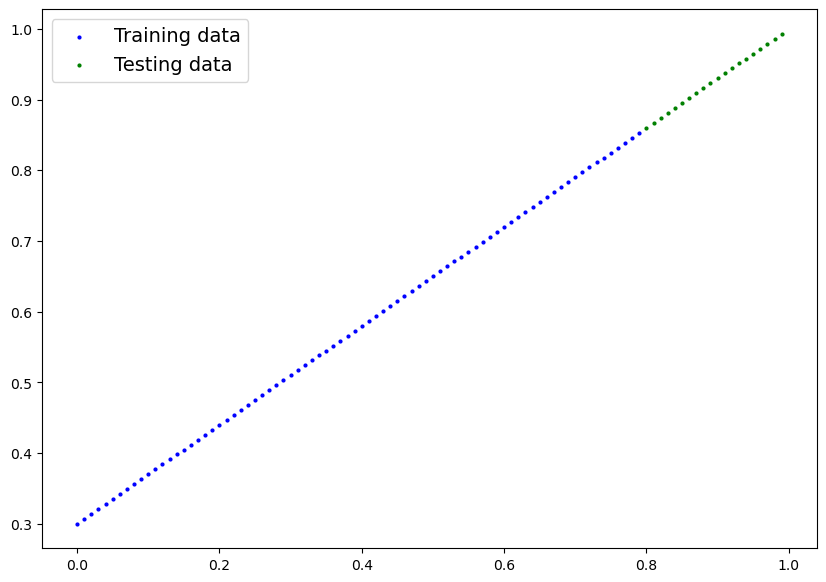

In [45]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [46]:
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
). to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.1)

In [48]:
torch.manual_seed(42)
epochs=1000
X_train_regression=X_train_regression.to(device)
y_train_regression=y_train_regression.to(device)
X_test_regression=X_test_regression.to(device)
y_test_regression=y_test_regression.to(device)
for epoch in range(epochs):
    y_pred=model_2(X_train_regression)
    loss=loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        test_pred=model_2(X_test_regression)
        test_loss=loss_fn(test_pred,y_test_regression)
        if epoch %1==0:
            print(f"Epoch:{epoch}| Train_loss:{loss:.5f}, Test loss:{test_loss:.5f}")

        


Epoch:0| Train_loss:0.75986, Test loss:0.16554
Epoch:1| Train_loss:0.06512, Test loss:0.48767
Epoch:2| Train_loss:0.46302, Test loss:0.37146
Epoch:3| Train_loss:0.22735, Test loss:0.21568
Epoch:4| Train_loss:0.27881, Test loss:0.43140
Epoch:5| Train_loss:0.24802, Test loss:0.03703
Epoch:6| Train_loss:0.16196, Test loss:0.47614
Epoch:7| Train_loss:0.26238, Test loss:0.08603
Epoch:8| Train_loss:0.09433, Test loss:0.31569
Epoch:9| Train_loss:0.13346, Test loss:0.06591
Epoch:10| Train_loss:0.19077, Test loss:0.39410
Epoch:11| Train_loss:0.18741, Test loss:0.04653
Epoch:12| Train_loss:0.12289, Test loss:0.38711
Epoch:13| Train_loss:0.17027, Test loss:0.06785
Epoch:14| Train_loss:0.11673, Test loss:0.32781
Epoch:15| Train_loss:0.12684, Test loss:0.06086
Epoch:16| Train_loss:0.10017, Test loss:0.31971
Epoch:17| Train_loss:0.13731, Test loss:0.01505
Epoch:18| Train_loss:0.14015, Test loss:0.37320
Epoch:19| Train_loss:0.16564, Test loss:0.08379
Epoch:20| Train_loss:0.10658, Test loss:0.27317
Ep

In [49]:
model_2.eval()
with torch.inference_mode():
    y_pred=model_2(X_test_regression)

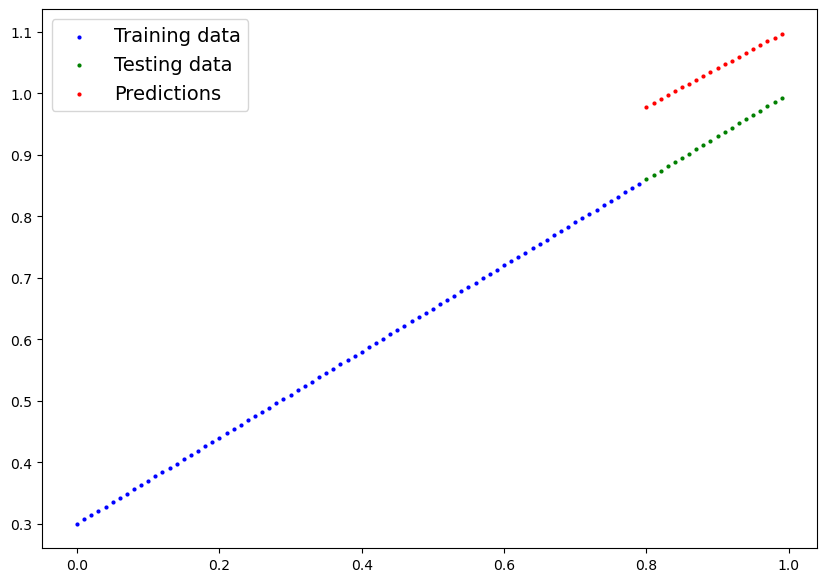

In [50]:
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_pred.cpu())

### NOn linearity Model training


In [51]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
 

In [52]:
x,y=make_circles(n_samples=1000,noise=0.03,random_state=42)

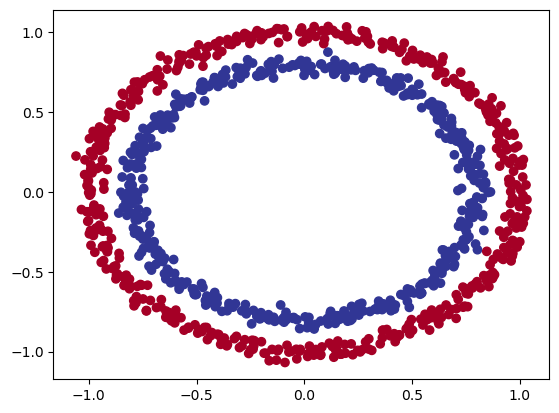

In [53]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [54]:

x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train[:5])

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])


In [56]:
print(y_train[:5])

tensor([1., 0., 0., 0., 1.])


In [57]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU()
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# instantiate the model outside of the class body
model_3 = CircleModelV2().to(device)

print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [58]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),lr=0.1)

In [59]:
torch.manual_seed(42)
epochs=1000
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

In [60]:
for epoch in range(epochs):
    model_3.train()
    y_logits=model_3(x_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_3.eval()
    with torch.inference_mode():
        test_logits=model_3(x_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch%100==0:
         print(f"Epoch:{epoch}| Train_loss:{loss:.5f}, Test loss:{test_loss:.5f}")
        

Epoch:0| Train_loss:0.69295, Test loss:0.69319
Epoch:100| Train_loss:0.69115, Test loss:0.69102
Epoch:200| Train_loss:0.68977, Test loss:0.68940
Epoch:300| Train_loss:0.68795, Test loss:0.68723
Epoch:400| Train_loss:0.68517, Test loss:0.68411
Epoch:500| Train_loss:0.68102, Test loss:0.67941
Epoch:600| Train_loss:0.67515, Test loss:0.67285
Epoch:700| Train_loss:0.66659, Test loss:0.66322
Epoch:800| Train_loss:0.65160, Test loss:0.64757
Epoch:900| Train_loss:0.62362, Test loss:0.62145


In [61]:
model_3.eval()
with torch.inference_mode():
    y_preds=torch.round(torch.sigmoid(model_3(x_test).squeeze()))
y_preds[:10],y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

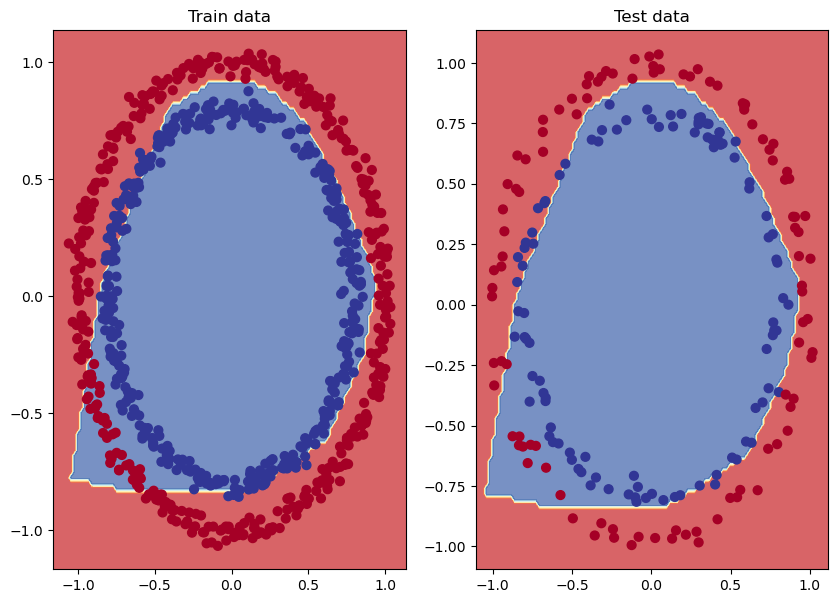

In [62]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train data")
plot_decision_boundary(model_3,x_train,y_train)

plt.subplot(1,2,2)
plt.title("Test data")
plot_decision_boundary(model_3,x_test,y_test)


### Replicating non-linear activation function 


In [63]:
A=torch.arange(-10,10.1,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

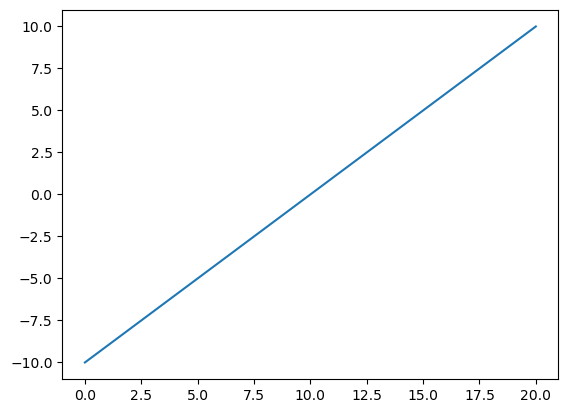

In [64]:
plt.plot(A)

In [65]:
def relu(x):
    return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,
         4.,  5.,  6.,  7.,  8.,  9., 10.])

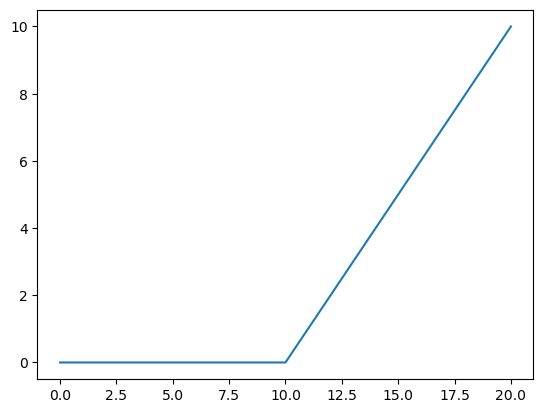

In [66]:
# Plot the value of A after Processing through relu
plt.plot(relu(A))

In [67]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01, 9.9995e-01])

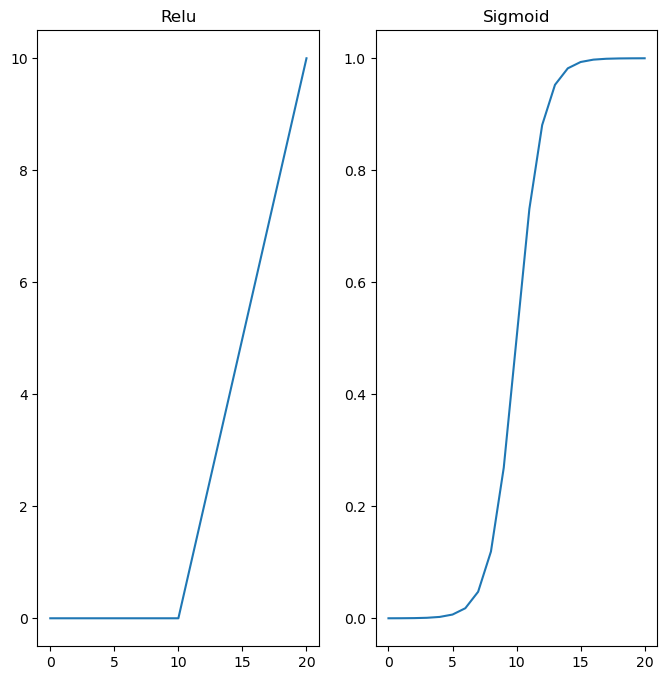

In [68]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title("Relu")
plt.plot(relu(A))
plt.subplot(1,2,2)
plt.title("Sigmoid")
plt.plot(sigmoid(A))

### Creating Multiclassification model


In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [74]:
x_blob,y_blob=make_blobs(n_samples=1000,n_features=2, centers=4,cluster_std=1.5,random_state=42)


In [75]:
x_blob=torch.from_numpy(x_blob).type(torch.float)

In [77]:
y_blob=torch.from_numpy(y_blob).type(torch.float)

In [79]:
print(x_blob)

print(x_blob.shape)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        ...,
        [ 3.2158,  5.9217],
        [-7.7939, -7.1606],
        [-9.6816,  7.0097]])
torch.Size([1000, 2])


In [82]:
print(y_blob[:5])
print(y_blob.shape)

tensor([3., 2., 2., 1., 1.])
torch.Size([1000])


In [83]:
#split the data into train and test 
x_blob_train, y_blob_train,x_blob_test, y_blob_test=train_test_split(x_blob,y_blob,test_size=0.2,random_state=42)

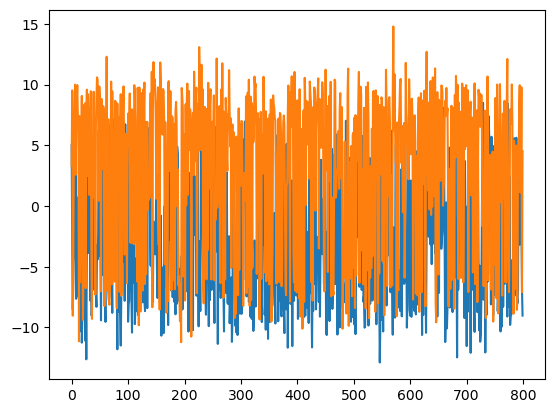

In [84]:
plt.plot(x_blob_train)

In [85]:
print(x_blob_train.shape )

torch.Size([800, 2])


In [87]:
print(y_blob_train.shape)

torch.Size([200, 2])


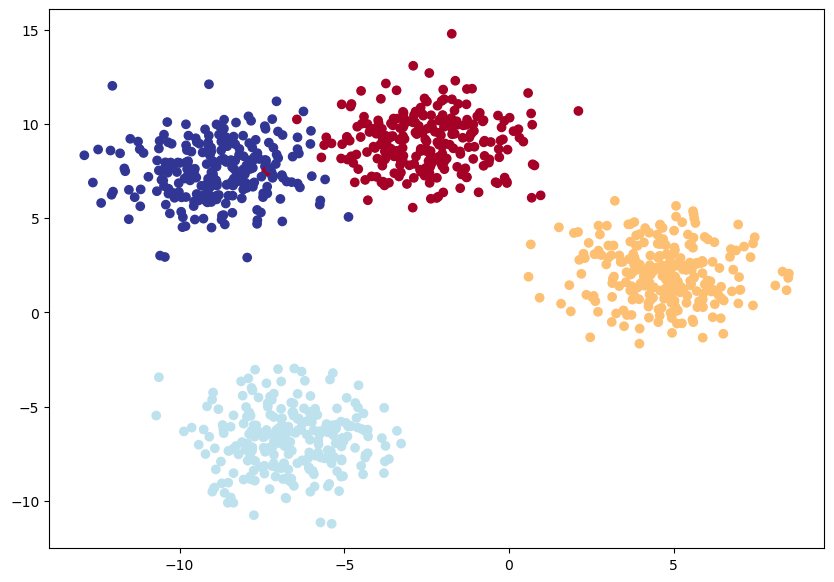

In [91]:
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob, cmap=plt.cm.RdYlBu)

Device avalibality to use GPU

In [92]:
device="cuda" if torch.cuda.is_available() else "cpu"
device 

'cpu'

Building multi classification model 
